# Check for hotter-is-better pattern for $r_m$

In [3]:
rm(list=ls())
graphics.off()

require('tidyverse')
require('cowplot')
require('patchwork')

## Mass-corrected $r_{m,opt}$ vs $r_m$ $T_{pk}$'s

Rows: 22000 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): species
dbl (19): temp, alpha, alphaLwr, alphaUpr, curve_ID, bmax, bmaxLwr, bmaxUpr,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



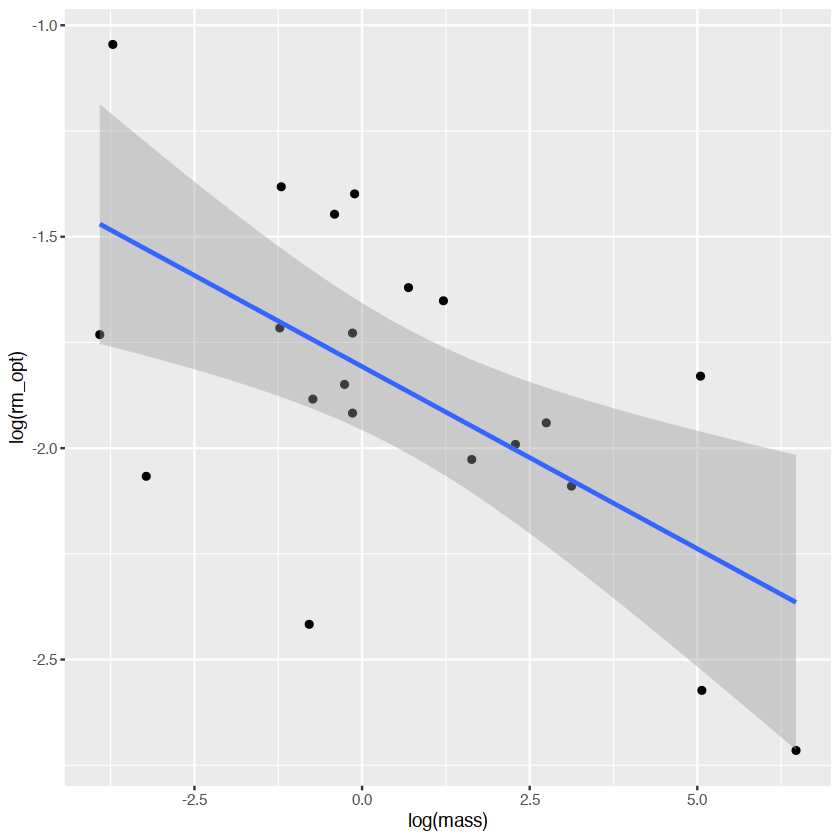


Call:
lm(formula = log(rm_opt) ~ log(mass) + kT, data = rm_dataA)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64185 -0.13419  0.02377  0.14725  0.38243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.60211    6.66457   2.491 0.022724 *  
log(mass)   -0.09817    0.02256  -4.352 0.000384 ***
kT          -0.47975    0.17367  -2.762 0.012829 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2771 on 18 degrees of freedom
Multiple R-squared:  0.5587,	Adjusted R-squared:  0.5096 
F-statistic: 11.39 on 2 and 18 DF,  p-value: 0.0006353


(Intercept)   log(mass)          kT 
16.60211327 -0.09816506 -0.47974895

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,1.1638125,1.16381245,15.153960,0.001066369
kT,1,0.5860347,0.58603473,7.630737,0.012828811
Residuals,18,1.3823861,0.07679923,NA,NA


`geom_smooth()` using formula 'y ~ x'



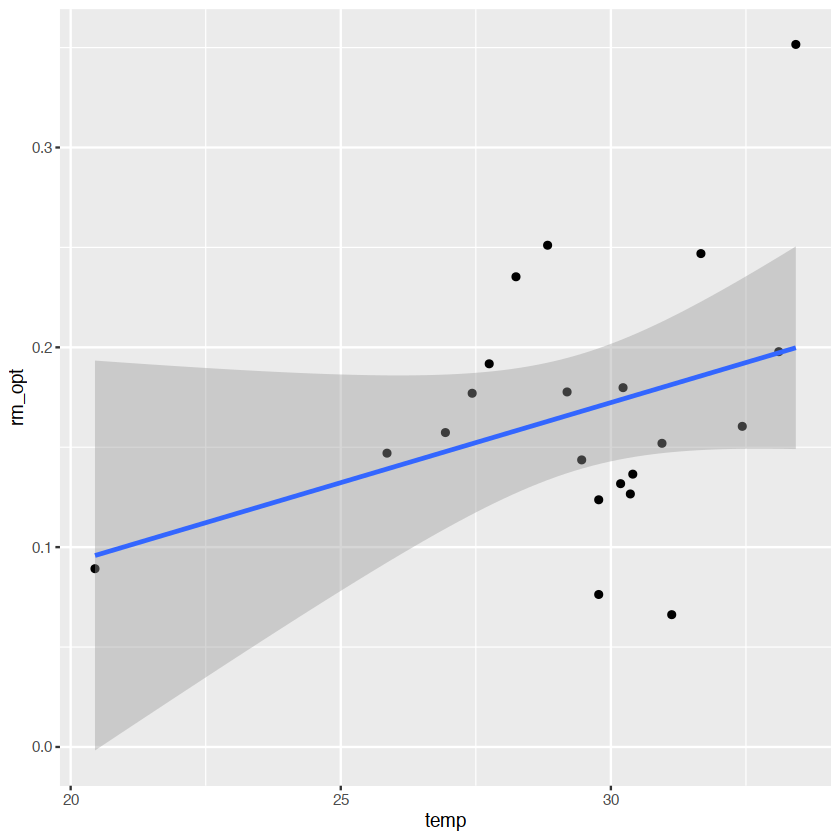

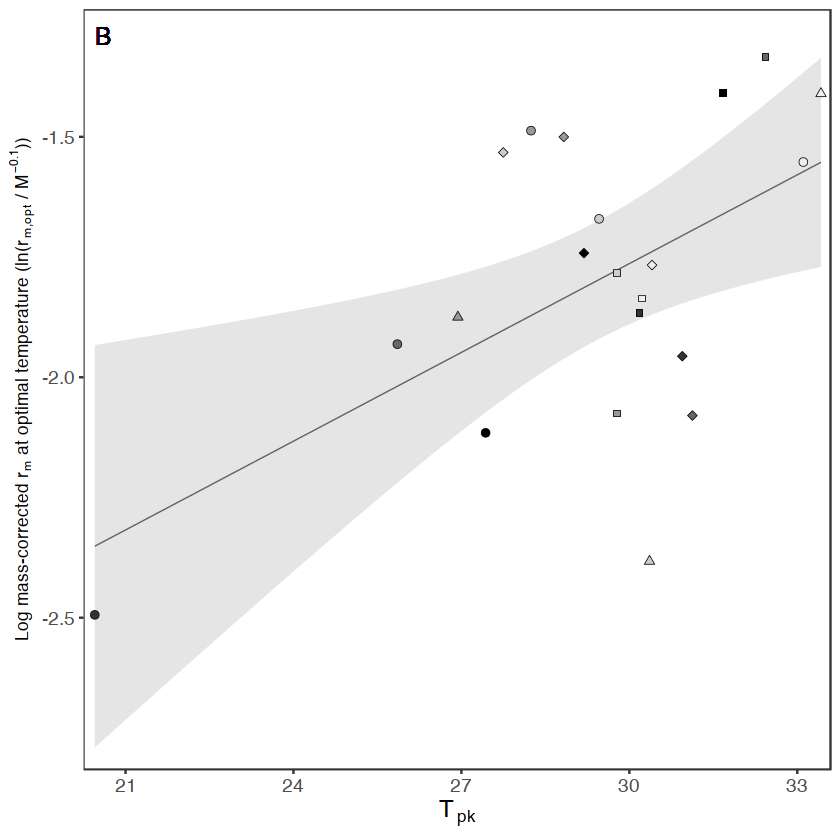

In [4]:
rm_data <- read_csv('../results/rm_optSizeScaling.csv') %>% 
  group_by(species) %>% 
  slice(which.max(rm_opt)) %>%
  arrange(curve_ID)

rm_data$kT <- 1/(8.617333262145 * 10^-5 * (rm_data$temp+273.15))

rm_dataA <- rm_data %>% filter(species != 'Anoplophora glabripennis') # remove outlier from regression

#plot uncorrected data in log-log scale
rm_dataA %>%
  ggplot(aes(x=log(mass), y = log(rm_opt)))+
  geom_point()+
  geom_smooth(method = 'lm')

#plot rm_opt vs T
rm_dataA %>%
  ggplot(aes(x = temp, y = rm_opt)) +
  geom_point()+
  geom_smooth(method = 'lm')

# linear model (note the allometry is linear in log-log scale)
rm_model <- lm(log(rm_opt) ~ log(mass) + kT, data = rm_dataA)
summary(rm_model)
coef(rm_model)

save(rm_model,file= "../results/rm_MTE_model.Rdata")

cf <-  confint(rm_model,level = .95)
anova(rm_model)

#r <- lm(log(rm_opt/mass^coef(rm_model)[2]) ~ temp, data = rm_dataA)
#summary(r)

#plot rm_opt in 1/kT, correcting for mass
MassCorr_rm_opt <- 
  rm_dataA %>%
  ggplot(aes(x = temp, y = log(rm_opt/mass^coef(rm_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("Log mass-corrected ",italic(r[m]),
                                            " at optimal temperature (ln(",
                                            italic(r[paste(m,",", opt)])," / ",
                                            italic(M^-0.10),"))"))),
                     limits=c(-2.8,-1.25),
                     expand = c(0.01, 0),
                     breaks=seq(-2.5,-1.5, by=0.5))+
  scale_x_continuous(expression(paste(italic(T[pk]))),
                     limits=c(20.25,33.6),
                     expand = c(0, 0),
                     breaks=seq(21,33, by=3))+
  geom_point(aes(shape = species, fill = species), size=2,stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=7,ncol=3,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999",'#666666',"#333333","#000000",
                               "#EEEEEE","#CCCCCC","#999999",'#666666',"#333333","#000000",
                               "#EEEEEE","#CCCCCC","#999999",'#666666',"#333333","#000000",
                               "#EEEEEE","#CCCCCC","#999999"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=7,ncol=3,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=7,ncol=3,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text = element_text(size=14, family = 'Times'),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.2, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.7, vjust=2, family='Times',
                label = "B"), size = 5, colour = "black")+
  theme(axis.title.y = element_text(size = 10))

MassCorr_rm_opt


# Analyses of $r_m$ vs distribution of trait $T_{pk}$s

#### Relationship of $r_{m,opt}$ vs distribution of trait $T_{pk}$'s

In [5]:
# Sum of trait Tpks versus mass corrected r_m, opt

Species <- rm_data$species

alphaTpks <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), conf_upper = as.numeric(conf_upper))

zjTpks <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))


zTpks <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

bmaxTpks <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

AllTpks <- bind_rows(alphaTpks,zjTpks,zTpks,bmaxTpks)

head(AllTpks)

# write_csv(AllTpks, '../results/AllTpkParams.csv')

param,species,estimate,conf_lower,conf_upper,trait
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
topt,Tetraneura nigriabdominalis,30.648,30.51723,30.78992,juvenile development rate
topt,Stethorus punctillum,32.875,32.78152,33.01626,juvenile development rate
topt,Tetranychus mcdanieli,35.182,34.89144,35.70428,juvenile development rate
topt,Muscidifurax zaraptor,32.038,31.87015,32.66561,juvenile development rate
topt,Aphis nasturtii,30.874,29.76652,31.81278,juvenile development rate
topt,Rhopalosiphum maidis,27.926,27.34118,28.51675,juvenile development rate


In [6]:
load("../results/rm_MTE_model.Rdata") # Load linear model fitted in previous step (04_rmCalcs)

In [7]:
#prepare data for plotting
rm_data <- rm_data %>% 
           mutate(rm_massCor = rm_opt/mass^coef(rm_model)[2])
         
#Calculate variance and Sum

OptVar <- AllTpks %>% group_by(species) %>%
  summarise(variance = var(estimate))
OptSum <- AllTpks %>% group_by(species) %>%
  summarise(sum = sum(estimate))

In [8]:
PlotData <- left_join(rm_data, OptVar, by="species")
PlotData <- left_join(PlotData, OptSum, by="species")
head(PlotData)

write_csv(PlotData,'../results/rm_optSizeScaling_w_tpksums.csv')

species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,zjUpr,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,variance,sum
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.97297,297.190161,316.589257,275.438861,1,3.279634,2.502936,4.185761,0.01833954,⋯,0.001402478,0.01,0.0127539,0.01050471,0.01501273,159.8000000,38.53747,0.02098733,60.45173,90.701
Halyomorpha halys,29.77477,29.803247,35.147055,26.738998,2,6.254051,4.571432,7.953408,0.01385860,⋯,0.002917899,0.01,0.0763076,0.06770028,0.08018689,158.8100000,38.30825,0.12549230,43.70191,109.156
Aedes aegypti,33.10811,5.430507,6.139773,4.974288,3,8.966715,6.913063,10.160802,0.04764627,⋯,0.076836527,0.01,0.1978135,0.18504167,0.19297752,1.9991667,37.89130,0.21173314,78.98463,108.436
Anthonomus grandis,29.45946,11.006110,13.270318,9.919390,4,6.292496,5.369757,10.030917,0.04069540,⋯,0.034215172,0.01,0.1436557,0.13334613,0.15805344,15.6000000,38.34817,0.18812482,92.71248,90.858
Paracoccus marginatus,27.74775,11.249195,14.346792,9.138949,5,14.925416,10.285558,45.486877,0.05028942,⋯,0.012891693,0.01,0.1917489,0.16424916,0.24402898,3.3650000,38.56632,0.21600524,39.66024,84.752
Aphis gossypii,28.24324,4.573511,4.799221,4.398614,6,3.206500,2.552281,3.740294,0.12279223,⋯,0.061785550,0.01,0.2352995,0.20580818,0.25404828,0.6633333,38.50291,0.22600667,67.62298,87.435


In [9]:
# load simulaion results, filtering by only r_opt values of rows with predicted optimal order of T_pk's 

sim_results_opt <- read.csv("../results/sim_results.csv") %>% filter(Opt_T_pk_order == 1) 

sim_results_notopt <- read.csv("../results/sim_results.csv") %>% filter(Opt_T_pk_order == 0) 

head(sim_results_opt)

,T_pk_sums,T_pk_vars,r_m_opt,T_opt,Opt_T_pk_order
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,81.53854,103.71849,0.07250142,16.05,1
2,65.22241,114.33503,-0.01005402,10.30,1
3,84.72659,138.90059,0.03974080,13.45,1
4,80.22064,113.52081,0.05692468,14.55,1
5,61.86317,97.56244,0.04888265,13.70,1
6,91.28361,88.64286,0.12810141,19.20,1


## $r_m$ vs sum of trait  $T_{pk}$s

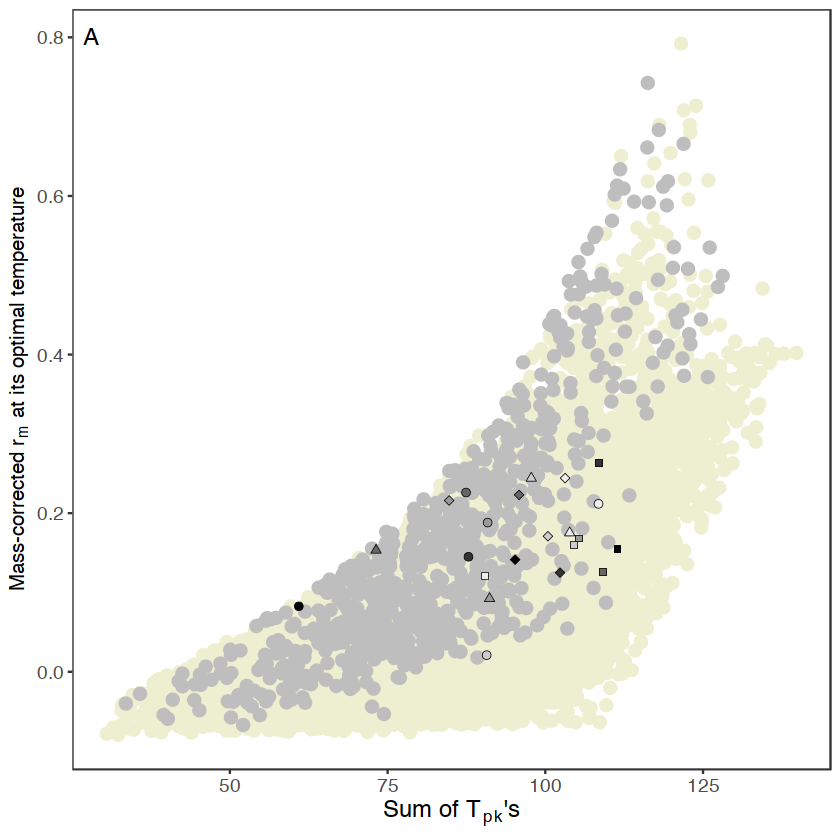

In [10]:
SumTpks_plot <- ggplot() +
  geom_point(data = sim_results_notopt, aes(x = T_pk_sums, y = r_m_opt), color="lightyellow2", size = 3) +
  geom_point(data = sim_results_opt, aes(x = T_pk_sums, y = r_m_opt), color="gray", size = 3)+
  geom_point(data = PlotData, aes(x = sum, y = rm_massCor, shape=species, fill=species), 
             size=2, stroke=0.25)+ 
  scale_y_continuous(expression(plain(paste("Mass-corrected ",italic(r[m]),
                                            " at its optimal temperature"))))+
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s")))) +
  theme_bw()+
  theme(text=element_text(family="Times")) + 
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=7,ncol=3,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999",'#666666',"#333333","#000000",
                               "#EEEEEE","#CCCCCC","#999999",'#666666',"#333333","#000000",
                               "#EEEEEE","#CCCCCC","#999999",'#666666',"#333333","#000000",
                               "#EEEEEE","#CCCCCC","#999999",'#666666'),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=7,ncol=3,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333",
                                 "#333333","#333333","#333333",
                                 "#333333","#333333","#333333",
                                 "#333333","#333333","#333333",
                                 "#333333","#333333","#333333",
                                 "#333333", "#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=7,ncol=3,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+ 
  theme(text = element_text(size=14),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  theme(panel.grid.minor = element_blank(),
        panel.grid.major = element_blank())+
  theme(axis.title.y = element_text(size=12))+
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.7, vjust=2, family='Times',
                label = "A"), size = 5, colour = "black")

SumTpks_plot


## Relationship between $r_{m,opt}$ and $T_{pk}$ of (mass-corrected) $\alpha$ 

In [11]:
# Create argument containing target species
spps <- "case_when(species == 'Anoplophora glabripennis' ~ '1', 
        species == 'Halyomorpha halys' ~ '2', 
        species == 'Aedes aegypti' ~ '3',
        species == 'Anthonomus grandis' ~ '4',
        species == 'Paracoccus marginatus' ~ '5',
        species == 'Aphis gossypii' ~ '6',
        species == 'Bemisia tabaci' ~ '7',
        species == 'Tetraneura nigriabdominalis' ~ '8',
        species == 'Stethorus punctillum' ~ '9',
        species == 'Tetranychus mcdanieli' ~ '10',
        species == 'Muscidifurax zaraptor' ~ '11',
        species == 'Aphis nasturtii' ~ '12',
        species == 'Rhopalosiphum maidis' ~ '13',
        species == 'Thrips hawaiiensis' ~ '14',
        species == 'Helicoverpa armigera' ~ '15',
        species == 'Scapsipedus icipe' ~ '16',
        species == 'Hyperaspis notata' ~ '17',
        species == 'Toxoptera citricida' ~ '18',
        species == 'Ophraella communa' ~ '19',
        species == 'Bemisia argentifolii' ~ '20',
        species == 'Dactylopius austrinus' ~ '21',
        species == 'Aulacorthum solani' ~ '22')"

# Read in the trait data
alphaMass <- as_tibble(read.csv('../data/a_pksT_pksMass.csv')) %>% 
  select(species, a_pk, a_pkLwr, a_pkUpr) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

alphaMass

alpharm_data <- inner_join(rm_data, alphaMass)
alpharm_data

species,a_pk,a_pkLwr,a_pkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,0.003406889,0.003287747,0.004151901,1
Halyomorpha halys,0.044334972,0.037110534,0.052555003,2
Aedes aegypti,0.199835786,0.177338682,0.218005861,3
Anthonomus grandis,0.118202637,0.101758189,0.148880707,4
Paracoccus marginatus,0.091667630,0.073527267,0.135763697,5
Aphis gossypii,0.221659340,0.208015497,0.229455901,6
Bemisia tabaci,0.082825022,0.079432710,0.094269173,7
Tetraneura nigriabdominalis,0.117949376,0.116868649,0.118895585,8
Stethorus punctillum,0.152817553,0.144131053,0.165311673,9


Joining, by = c("species", "curve_ID")


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,a_pk,a_pkLwr,a_pkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.97297,297.190161,316.589257,275.438861,1,3.279634,2.502936,4.185761,0.01833954,⋯,0.01,0.01275390,1.050471e-02,0.01501273,159.8000000,38.53747,0.02098733,0.003406889,0.003287747,0.004151901
Halyomorpha halys,29.77477,29.803247,35.147055,26.738998,2,6.254051,4.571432,7.953408,0.01385860,⋯,0.01,0.07630760,6.770028e-02,0.08018689,158.8100000,38.30825,0.12549230,0.044334972,0.037110534,0.052555003
Aedes aegypti,33.10811,5.430507,6.139773,4.974288,3,8.966715,6.913063,10.160802,0.04764627,⋯,0.01,0.19781352,1.850417e-01,0.19297752,1.9991667,37.89130,0.21173314,0.199835786,0.177338682,0.218005861
Anthonomus grandis,29.45946,11.006110,13.270318,9.919390,4,6.292496,5.369757,10.030917,0.04069540,⋯,0.01,0.14365573,1.333461e-01,0.15805344,15.6000000,38.34817,0.18812482,0.118202637,0.101758189,0.148880707
Paracoccus marginatus,27.74775,11.249195,14.346792,9.138949,5,14.925416,10.285558,45.486877,0.05028942,⋯,0.01,0.19174885,1.642492e-01,0.24402898,3.3650000,38.56632,0.21600524,0.091667630,0.073527267,0.135763697
Aphis gossypii,28.24324,4.573511,4.799221,4.398614,6,3.206500,2.552281,3.740294,0.12279223,⋯,0.01,0.23529948,2.058082e-01,0.25404828,0.6633333,38.50291,0.22600667,0.221659340,0.208015497,0.229455901
Bemisia tabaci,30.22523,12.226305,13.061690,10.742313,7,9.793602,7.520674,11.794230,0.06851774,⋯,0.01,0.17981067,1.612936e-01,0.19739044,0.2931250,38.25137,0.15940380,0.082825022,0.079432710,0.094269173
Tetraneura nigriabdominalis,29.18919,8.639694,8.704294,8.580309,8,3.037762,2.606394,3.839115,0.08826039,⋯,0.01,0.17766166,1.704250e-01,0.18837408,0.8673000,38.38245,0.17519597,0.117949376,0.116868649,0.118895585
Stethorus punctillum,30.94595,7.449749,7.965410,7.036821,9,6.478403,4.881562,8.662371,0.03427692,⋯,0.01,0.15195914,1.522272e-01,0.15006184,0.4800000,38.16071,0.14139559,0.152817553,0.144131053,0.165311673


In [12]:
# linear model (note the allometry is linear in log-log scale)
alpharm_model <- lm(log(rm_opt/mass^-0.1) ~ log(a_pk/mass^-0.27), data = alpharm_data)
summary(alpharm_model)
anova(alpharm_model)


Call:
lm(formula = log(rm_opt/mass^-0.1) ~ log(a_pk/mass^-0.27), data = alpharm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7364 -0.2165  0.0251  0.2900  0.6454 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.6467     0.2827  -2.288 0.033178 *  
log(a_pk/mass^-0.27)   0.5731     0.1245   4.602 0.000172 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3827 on 20 degrees of freedom
Multiple R-squared:  0.5143,	Adjusted R-squared:  0.4901 
F-statistic: 21.18 on 1 and 20 DF,  p-value: 0.0001724


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(a_pk/mass^-0.27),1,3.102347,3.1023468,21.18138,0.0001724112
Residuals,20,2.929315,0.1464657,NA,NA


`geom_smooth()` using formula 'y ~ x'



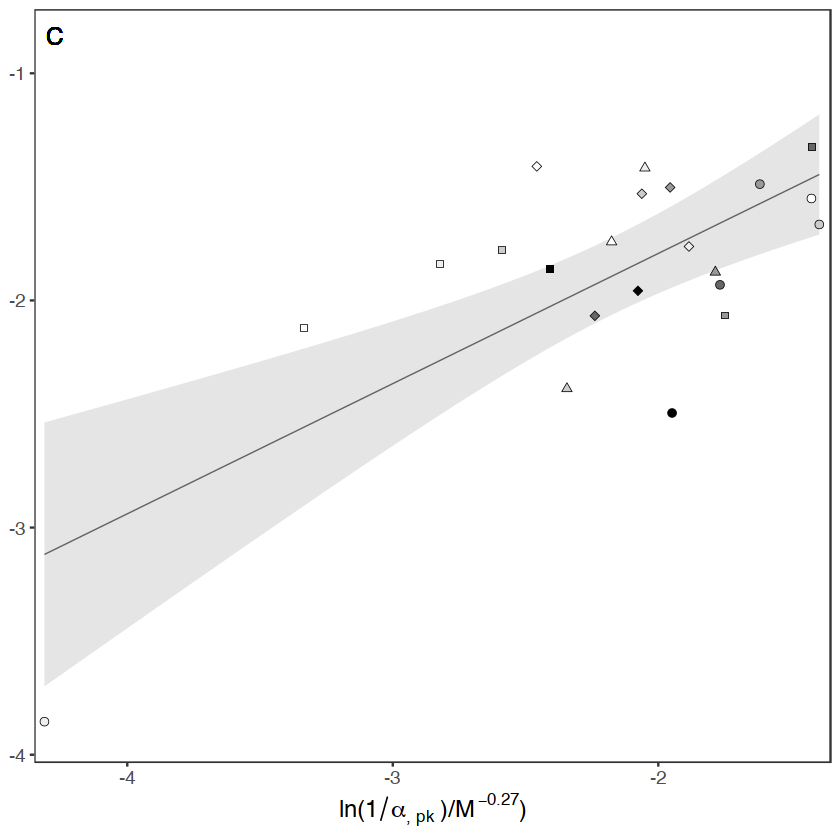

In [13]:
MassCorr_rm_opt_vs_AlphaTpk <-
  alpharm_data %>%
  ggplot(aes(x=log(a_pk/mass^-0.27), y = log(rm_opt/mass^-0.10)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[m][','][' '][opt])," / ",
                                            italic(M^-0.1),"))"))),
                     limits=c(-4,-0.75),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(1/alpha[','][' '][pk])~")/",
                                            italic(M^-0.27),")"))),
                     limits=c(-4.35,-1.35),
                     expand = c(0, 0),
                     breaks=seq(-4,-2, by=1))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF", "#EEEEEE","#CCCCCC","#999999"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=14),
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.7, vjust=2, family='Times',
                label = "C"),size = 5, colour = "black")+
  theme(axis.title.y = element_blank(), legend.position = 'none')
  
MassCorr_rm_opt_vs_AlphaTpk





`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



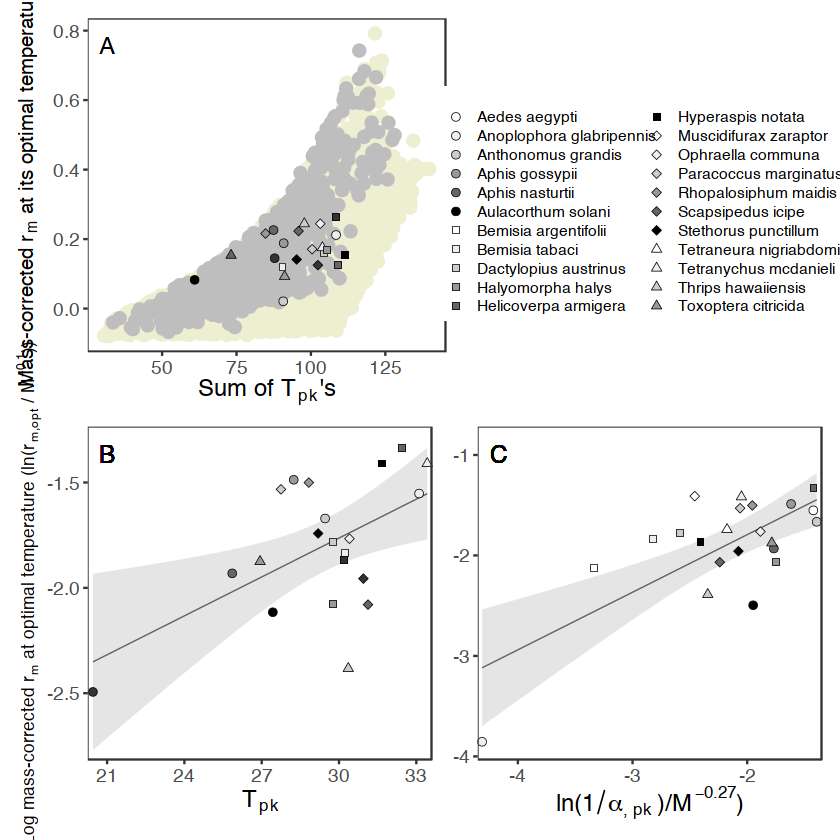

In [30]:
legend <- get_legend(MassCorr_rm_opt_vs_AlphaTpk + theme(legend.position = c(0.515,0.525)))

rm_calcs_Plot <- (SumTpks_plot+legend)/(MassCorr_rm_opt+MassCorr_rm_opt_vs_AlphaTpk)

rm_calcs_Plot

save_plot(rm_calcs_Plot, file="../results/SumTpks.pdf", 
          base_height=18, base_width = 19.5, base_asp = 1, units="cm")

## Relationship between $r_{m,opt}$ and $T_{pk}$s of other (mass-corrected) traits ($b_{max}$, $z$ and $z_J$) 

In [15]:
# bmax (fecundity)


betaMass <- as_tibble(read_csv('../data/bmaxT_pksMass.csv')) %>%
  select(species, bmax, bmaxLwr, bmaxUpr) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  rename(b_maxpk = bmax, b_maxpkLwr = bmaxLwr, b_maxpkUpr = bmaxUpr) %>%
  arrange(curve_ID)

betaMass

betarm_data <- inner_join(rm_data, betaMass)
betarm_data


Rows: 44 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): bmax, bmaxLwr, bmaxUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,b_maxpk,b_maxpkLwr,b_maxpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,3.286732,2.474436,4.346238,1
Halyomorpha halys,7.579694,6.103184,9.660420,2
Aedes aegypti,10.132196,9.026152,11.677251,3
Anthonomus grandis,7.287018,5.873555,11.107361,4
Paracoccus marginatus,26.757230,23.687671,34.570577,5
Aphis gossypii,3.301794,2.776098,3.983136,6
Bemisia tabaci,13.001684,9.355172,17.998032,7
Tetraneura nigriabdominalis,3.079183,2.494742,3.597847,8
Stethorus punctillum,7.114108,6.305991,8.840443,9


Joining, by = c("species", "curve_ID")


species,temp,alpha,alphaLwr,alphaUpr,curve_ID,bmax,bmaxLwr,bmaxUpr,z,⋯,kappa,rm_opt,rm_optLwr,rm_optUpr,mass,kT,rm_massCor,b_maxpk,b_maxpkLwr,b_maxpkUpr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,27.97297,297.190161,316.589257,275.438861,1,3.279634,2.502936,4.185761,0.01833954,⋯,0.01,0.01275390,1.050471e-02,0.01501273,159.8000000,38.53747,0.02098733,3.286732,2.474436,4.346238
Halyomorpha halys,29.77477,29.803247,35.147055,26.738998,2,6.254051,4.571432,7.953408,0.01385860,⋯,0.01,0.07630760,6.770028e-02,0.08018689,158.8100000,38.30825,0.12549230,7.579694,6.103184,9.660420
Aedes aegypti,33.10811,5.430507,6.139773,4.974288,3,8.966715,6.913063,10.160802,0.04764627,⋯,0.01,0.19781352,1.850417e-01,0.19297752,1.9991667,37.89130,0.21173314,10.132196,9.026152,11.677251
Anthonomus grandis,29.45946,11.006110,13.270318,9.919390,4,6.292496,5.369757,10.030917,0.04069540,⋯,0.01,0.14365573,1.333461e-01,0.15805344,15.6000000,38.34817,0.18812482,7.287018,5.873555,11.107361
Paracoccus marginatus,27.74775,11.249195,14.346792,9.138949,5,14.925416,10.285558,45.486877,0.05028942,⋯,0.01,0.19174885,1.642492e-01,0.24402898,3.3650000,38.56632,0.21600524,26.757230,23.687671,34.570577
Aphis gossypii,28.24324,4.573511,4.799221,4.398614,6,3.206500,2.552281,3.740294,0.12279223,⋯,0.01,0.23529948,2.058082e-01,0.25404828,0.6633333,38.50291,0.22600667,3.301794,2.776098,3.983136
Bemisia tabaci,30.22523,12.226305,13.061690,10.742313,7,9.793602,7.520674,11.794230,0.06851774,⋯,0.01,0.17981067,1.612936e-01,0.19739044,0.2931250,38.25137,0.15940380,13.001684,9.355172,17.998032
Tetraneura nigriabdominalis,29.18919,8.639694,8.704294,8.580309,8,3.037762,2.606394,3.839115,0.08826039,⋯,0.01,0.17766166,1.704250e-01,0.18837408,0.8673000,38.38245,0.17519597,3.079183,2.494742,3.597847
Stethorus punctillum,30.94595,7.449749,7.965410,7.036821,9,6.478403,4.881562,8.662371,0.03427692,⋯,0.01,0.15195914,1.522272e-01,0.15006184,0.4800000,38.16071,0.14139559,7.114108,6.305991,8.840443


In [16]:
# linear model (note the allometry is linear in log-log scale)
betarm_model <- lm(log(rm_opt/mass^-0.1) ~ log(bmax/mass^0.12), data = betarm_data)
summary(betarm_model)
anova(betarm_model)


Call:
lm(formula = log(rm_opt/mass^-0.1) ~ log(bmax/mass^0.12), data = betarm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5774 -0.2471  0.1094  0.3396  0.6102 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -2.4401     0.2815  -8.668  3.3e-08 ***
log(bmax/mass^0.12)   0.2816     0.1341   2.100   0.0486 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4971 on 20 degrees of freedom
Multiple R-squared:  0.1807,	Adjusted R-squared:  0.1397 
F-statistic:  4.41 on 1 and 20 DF,  p-value: 0.04861


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(bmax/mass^0.12),1,1.089769,1.0897688,4.41033,0.04860996
Residuals,20,4.941893,0.2470946,NA,NA


`geom_smooth()` using formula 'y ~ x'



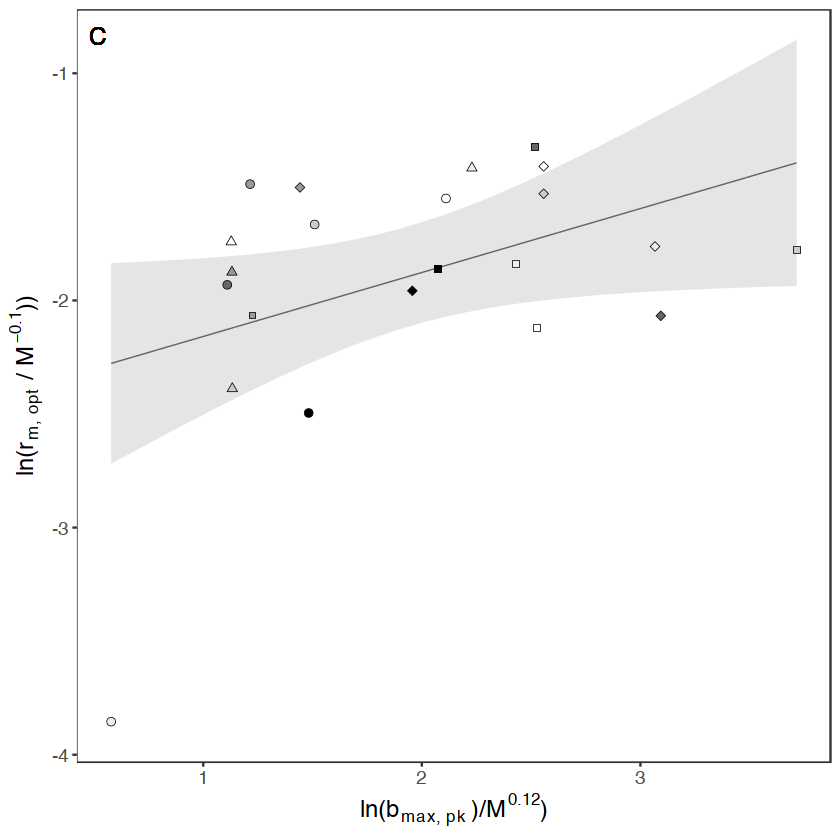

In [17]:
## plot $b_max$ vs $r_opt$

MassCorr_rm_opt_vs_BetaTpk <-
  betarm_data %>%
  ggplot(aes(x=log(bmax/mass^0.12), y = log(rm_opt/mass^-0.1)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[m][','][' '][opt])," / ",
                                            italic(M^-0.1),"))"))),
                     limits=c(-4,-0.75),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(b[max][','][' '][pk])~")/",
                                            italic(M^0.12),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF", "#EEEEEE","#CCCCCC","#999999"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=14),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.7, vjust=2,
                label = "C"),size = 5, colour = "black", family='Times')

MassCorr_rm_opt_vs_BetaTpk


In [18]:
# z (adult mortality rate)

zMass <- as_tibble(read_csv('../data/z_pksT_pksMass.csv')) %>% 
  select(species, zpk, zpkLwr, zpkUpr) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

zMass

zrm_data <- inner_join(rm_data, zMass)


Rows: 34 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zpk, zpkLwr, zpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,zpk,zpkLwr,zpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,0.006981302,0.008340613,0.006026721,1
Halyomorpha halys,0.004118571,0.004708180,0.002783295,2
Aedes aegypti,0.029080306,0.033957240,0.024296551,3
Anthonomus grandis,0.015646824,0.018447864,0.013850260,4
Paracoccus marginatus,0.021560283,0.026348713,0.019552732,5
Aphis gossypii,0.032803103,0.033983297,0.032462923,6
Bemisia tabaci,0.039444080,0.042020167,0.036418754,7
Tetraneura nigriabdominalis,0.036058235,0.038715273,0.033018069,8
Stethorus punctillum,0.008930564,0.009925306,0.006199906,9


Joining, by = c("species", "curve_ID")


In [19]:
# linear model (note the allometry is linear in log-log scale)
zrm_model <- lm(log(rm_opt/mass^-0.1) ~ log(zpk/mass^-0.09), data = zrm_data)
summary(zrm_model)
anova(zrm_model)


Call:
lm(formula = log(rm_opt/mass^-0.1) ~ log(zpk/mass^-0.09), data = zrm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71200 -0.07651  0.11501  0.22107  0.47446 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)          -0.2405     0.5542  -0.434  0.66896   
log(zpk/mass^-0.09)   0.4219     0.1394   3.027  0.00666 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4548 on 20 degrees of freedom
Multiple R-squared:  0.3142,	Adjusted R-squared:  0.2799 
F-statistic: 9.163 on 1 and 20 DF,  p-value: 0.006657


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(zpk/mass^-0.09),1,1.895195,1.8951947,9.163349,0.006656698
Residuals,20,4.136467,0.2068234,NA,NA


`geom_smooth()` using formula 'y ~ x'



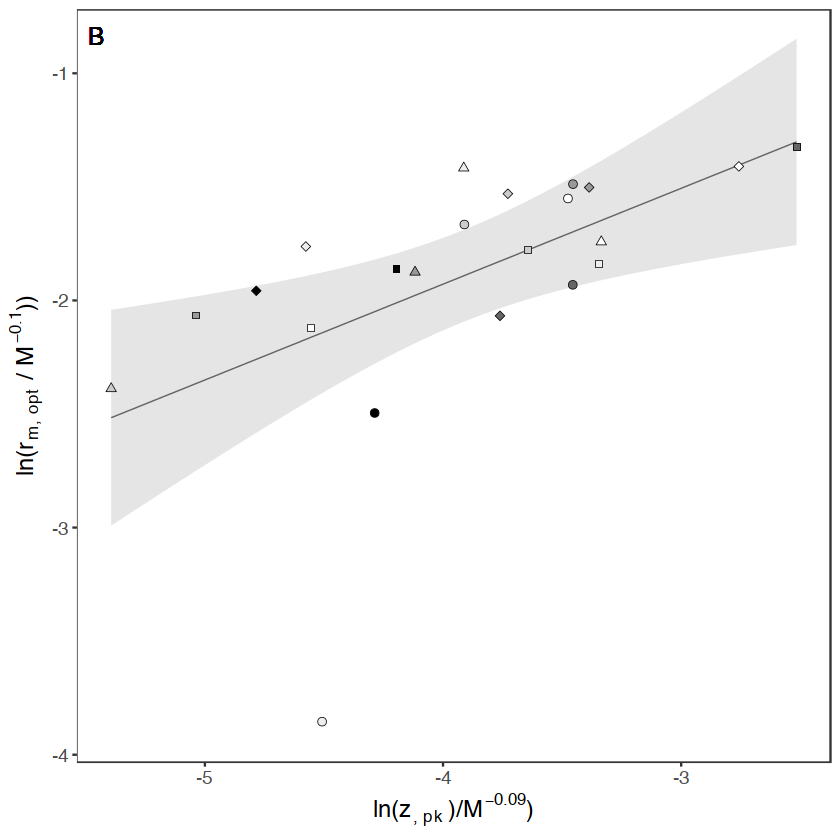

In [20]:
## plot $z$ vs $r_opt$

MassCorr_rm_opt_vs_zTpk <-
  zrm_data %>%
  ggplot(aes(x=log(zpk/mass^-0.09), y = log(rm_opt/mass^-0.1)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[m][','][' '][opt])," / ",
                                            italic(M^-0.1),"))"))),
                     limits=c(-4,-0.75),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(z[','][' '][pk])~")/",
                                            italic(M^-0.09),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF", "#EEEEEE","#CCCCCC","#999999"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=14),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf,hjust = -0.7, vjust=2,
                label = "B"),size = 5, colour = "black", family = 'Times') 


MassCorr_rm_opt_vs_zTpk


In [21]:
# $z_J$ (juvenile mortality rate)


zJMass <- as_tibble(read_csv('../data/zj_pksT_pksMass.csv')) %>% 
  select(species, zjpk, zjpkLwr, zjpkUpr) %>%
  filter(species == 'Anoplophora glabripennis' |
           species == 'Halyomorpha halys' |
           species == 'Aedes aegypti'|
           species == 'Anthonomus grandis' |
           species == 'Paracoccus marginatus' |
           species == 'Aphis gossypii' |
           species == 'Bemisia tabaci' |
           species == 'Tetraneura nigriabdominalis' |
           species == 'Stethorus punctillum' |
           species == 'Tetranychus mcdanieli' |
           species == 'Muscidifurax zaraptor' |
           species == 'Aphis nasturtii' |
           species == 'Rhopalosiphum maidis' |
           species == 'Thrips hawaiiensis' |
           species == 'Helicoverpa armigera' |
           species == 'Scapsipedus icipe' |
           species == 'Hyperaspis notata' |
           species == 'Toxoptera citricida'|
           species == 'Ophraella communa' |
           species == 'Bemisia argentifolii'|
           species == 'Dactylopius austrinus'|
           species == 'Aulacorthum solani') %>%
  mutate(curve_ID = eval(parse(text=spps))) %>%
  mutate(curve_ID = as.numeric(curve_ID)) %>%
  arrange(curve_ID)

zJMass

zJrm_data <- inner_join(rm_data, zJMass)


Rows: 34 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): zjpk, zjpkLwr, zjpkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,zjpk,zjpkLwr,zjpkUpr,curve_ID
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Anoplophora glabripennis,7.652256e-04,0.0008392504,6.743264e-04,1
Halyomorpha halys,2.134125e-03,0.0024486399,1.806119e-03,2
Aedes aegypti,2.017240e-02,0.0227815438,1.815153e-02,3
Anthonomus grandis,1.398698e-02,0.0148502193,1.338455e-02,4
Paracoccus marginatus,9.594182e-03,0.0127847175,7.755297e-03,5
Aphis gossypii,3.677762e-02,0.0436667630,3.355850e-02,6
Bemisia tabaci,1.285423e-02,0.0148617091,8.982088e-03,7
Tetraneura nigriabdominalis,9.275934e-03,0.0119946452,8.001464e-03,8
Stethorus punctillum,1.643507e-02,0.0186532555,1.452759e-02,9


Joining, by = c("species", "curve_ID")


In [22]:
# linear model (note the allometry is linear in log-log scale)
zJrm_model <- lm(log(rm_opt/mass^-0.11) ~ log(zjpk/mass^-0.22), data = zJrm_data)
summary(zJrm_model)
anova(zJrm_model)


Call:
lm(formula = log(rm_opt/mass^-0.11) ~ log(zjpk/mass^-0.22), data = zJrm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.80165 -0.10981  0.07107  0.30521  0.60200 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)   
(Intercept)          -1.41907    0.44760  -3.170  0.00481 **
log(zjpk/mass^-0.22)  0.09623    0.08957   1.074  0.29543   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5289 on 20 degrees of freedom
Multiple R-squared:  0.05457,	Adjusted R-squared:  0.007296 
F-statistic: 1.154 on 1 and 20 DF,  p-value: 0.2954


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(zjpk/mass^-0.22),1,0.3228618,0.3228618,1.15434,0.2954344
Residuals,20,5.5938788,0.2796939,NA,NA


`geom_smooth()` using formula 'y ~ x'



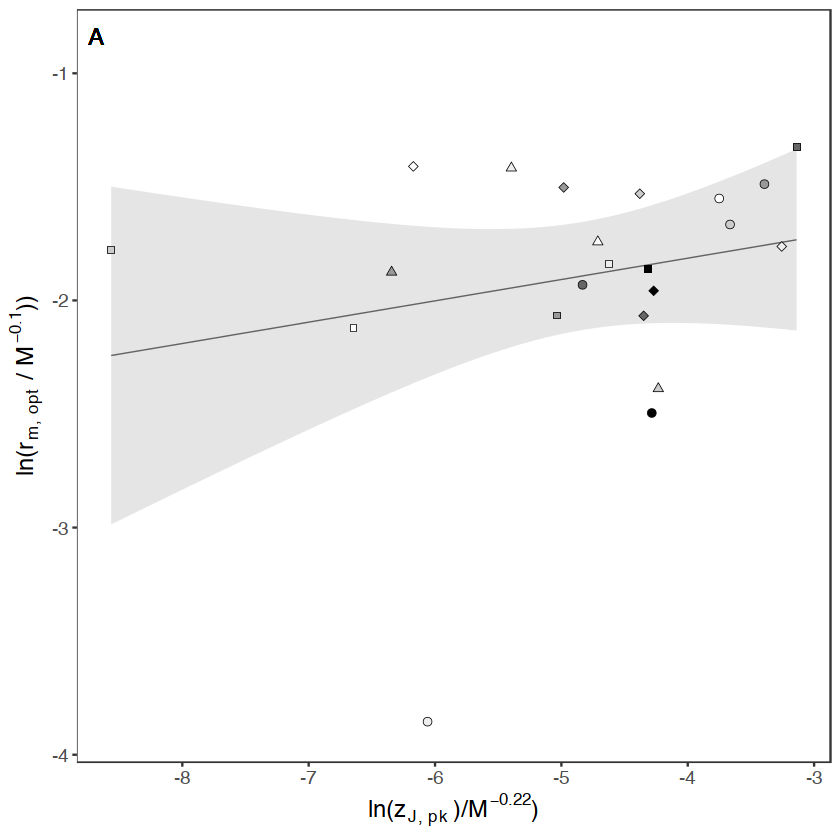

In [23]:
MassCorr_rm_opt_vs_zJTpk <-
  zJrm_data %>%
  ggplot(aes(x=log(zjpk/mass^-0.22), y = log(rm_opt/mass^-0.1)))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("ln(",italic(r[m][','][' '][opt])," / ",
                                            italic(M^-0.1),"))"))),
                     limits=c(-4,-0.75),
                     expand = c(0.01, 0),
                     breaks=seq(-4,-1, by=1))+
  scale_x_continuous(expression(plain(paste("ln(", italic(z[J][','][' '][pk])~")/",
                                            italic(M^-0.22),")"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF", "#EEEEEE","#CCCCCC","#999999"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=14),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.1, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.4, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())+
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.7, vjust=2,
                label = "A"), size = 5, colour = "black", family='Times')


MassCorr_rm_opt_vs_zJTpk


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



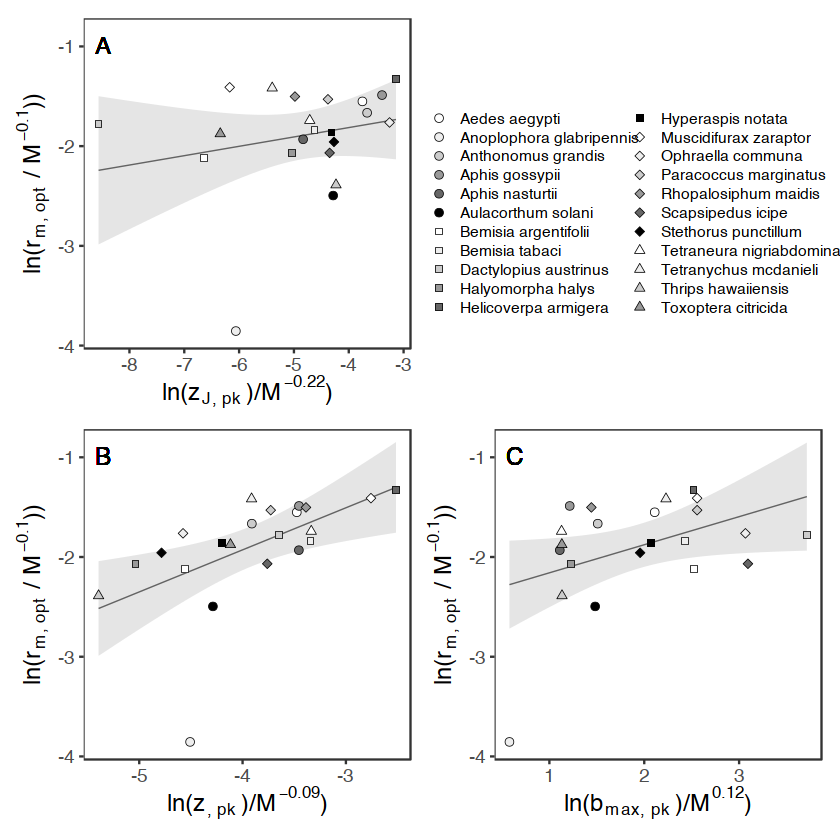

In [24]:

legend <- get_legend(MassCorr_rm_opt_vs_zJTpk + theme(legend.position = c(0.515,0.525)))

rm_vs_OtherTraitPks <- MassCorr_rm_opt_vs_zJTpk+legend+
  MassCorr_rm_opt_vs_zTpk+
  MassCorr_rm_opt_vs_BetaTpk+plot_layout(nrow = 2, byrow = TRUE)

rm_vs_OtherTraitPks


save_plot(rm_vs_OtherTraitPks, file= "../results/SI/rm_vs_OtherTraitPks.pdf",
          base_height=16, base_width = 17.5, base_asp = 1, units="cm")

## $r_m$ vs Variance of trait  $T_{pk}$s 

In [25]:
VarLM <-   lm(PlotData$rm_massCor ~ PlotData$variance)

summary(VarLM)


Call:
lm(formula = PlotData$rm_massCor ~ PlotData$variance)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14509 -0.03584 -0.00305  0.04796  0.09517 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.1746704  0.0310097   5.633 1.63e-05 ***
PlotData$variance -0.0001422  0.0004609  -0.308    0.761    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06065 on 20 degrees of freedom
Multiple R-squared:  0.004734,	Adjusted R-squared:  -0.04503 
F-statistic: 0.09512 on 1 and 20 DF,  p-value: 0.761


`geom_smooth()` using formula 'y ~ x'



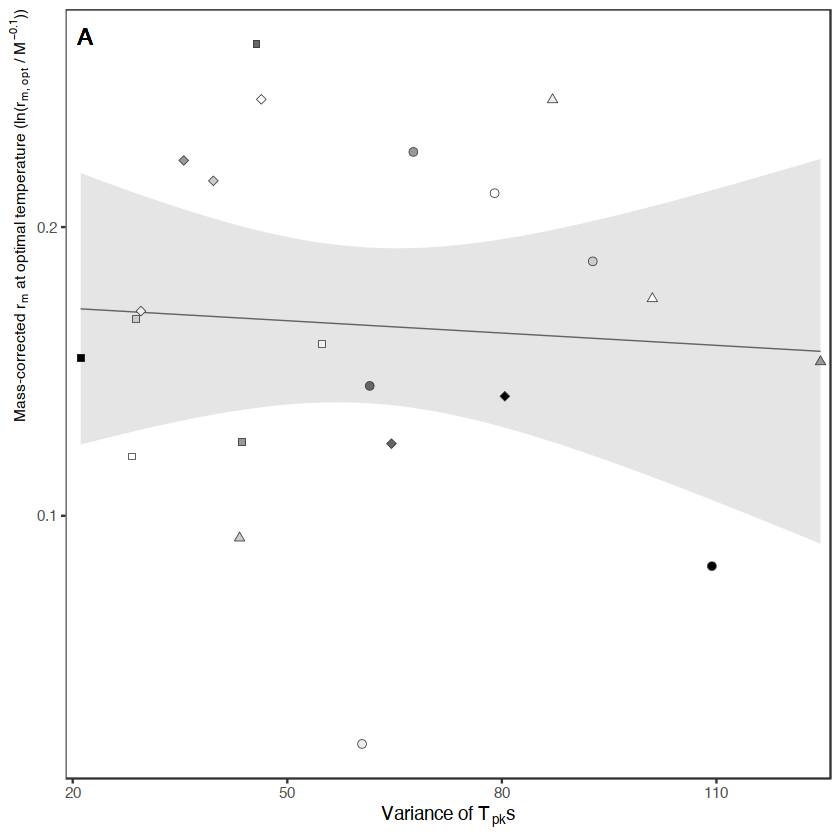

In [26]:
Var_rm <- ggplot(PlotData, aes(x=variance, y=rm_massCor, colour = species, fill = species)) +
  scale_x_continuous(expression(plain(paste("Variance of ", italic(T)[pk],'s'))),
                     limits =c(19,126),
                     expand = c(0, 0),
                     breaks=seq(20,120, by=30))+
  scale_y_continuous(expression(plain(paste("Mass-corrected ",italic(r[m]),
                                            " at optimal temperature (ln(",italic(r[m][','][' '][opt]),
                                            " / ", italic(M^-0.1),"))"))))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  geom_point(aes(shape=species, 
                 fill=species), size=2,stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF", "#EEEEEE","#CCCCCC","#999999"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 9, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.title.y = element_text(size=9, hjust=1))+
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.7, vjust=2,
                label = "A"),size = 5, colour = "black", family='Times')


Var_rm


## Relationship between Sum and Variance of trait $T_{pk}$'s 

`geom_smooth()` using formula 'y ~ x'



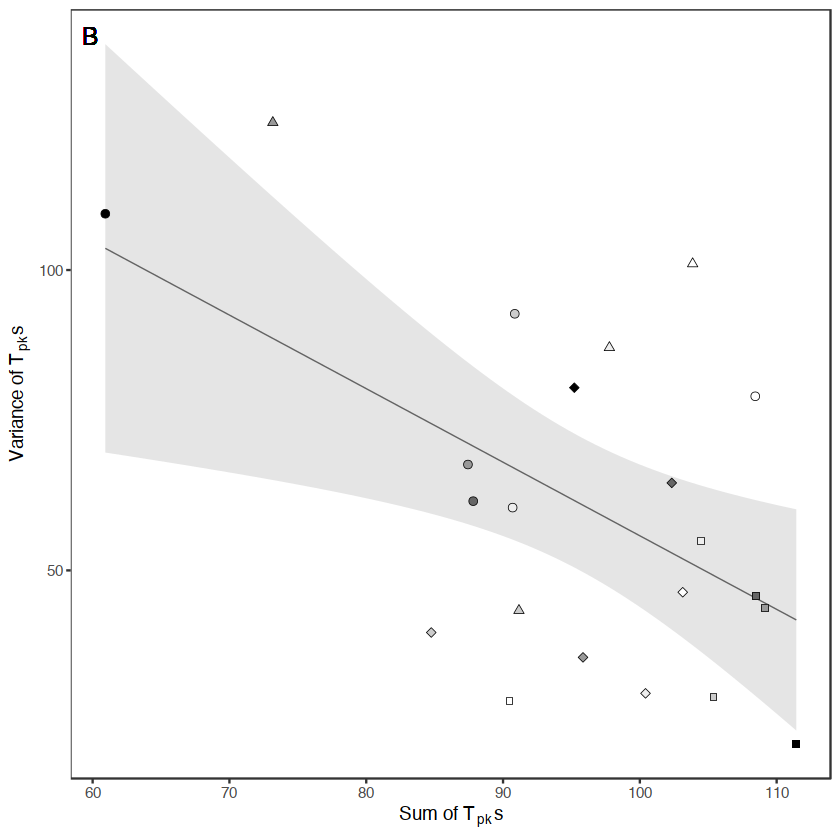

In [27]:

Sum_vs_Var_Tpks_plot <- PlotData %>%
  ggplot(aes(x = sum, y = variance))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill="gray")+
  scale_y_continuous(expression(plain(paste("Variance of ",italic("T"[pk]),"s"))))+
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"s"))))+
  geom_point(aes(shape=species, fill=species), size=2, stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,21,21,
                                22,22,22,22,22,22,
                                23,23,23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=11,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF","#EEEEEE","#CCCCCC","#999999",'#666666',"#000000",
                               "#FFFFFF", "#EEEEEE","#CCCCCC","#999999"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=11,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333","#333333","#333333","#333333",
                                 "#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=11,ncol=2,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text=element_text(family="Times"))+
  theme(text = element_text(size=11),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "white", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))+
  geom_text(aes(x = -Inf, y = Inf, hjust = -0.7, vjust=2,
                label = "B"), size = 5, colour = "black", family='Times')+
  theme(axis.title.y = element_text(hjust=0.5), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

Sum_vs_Var_Tpks_plot


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



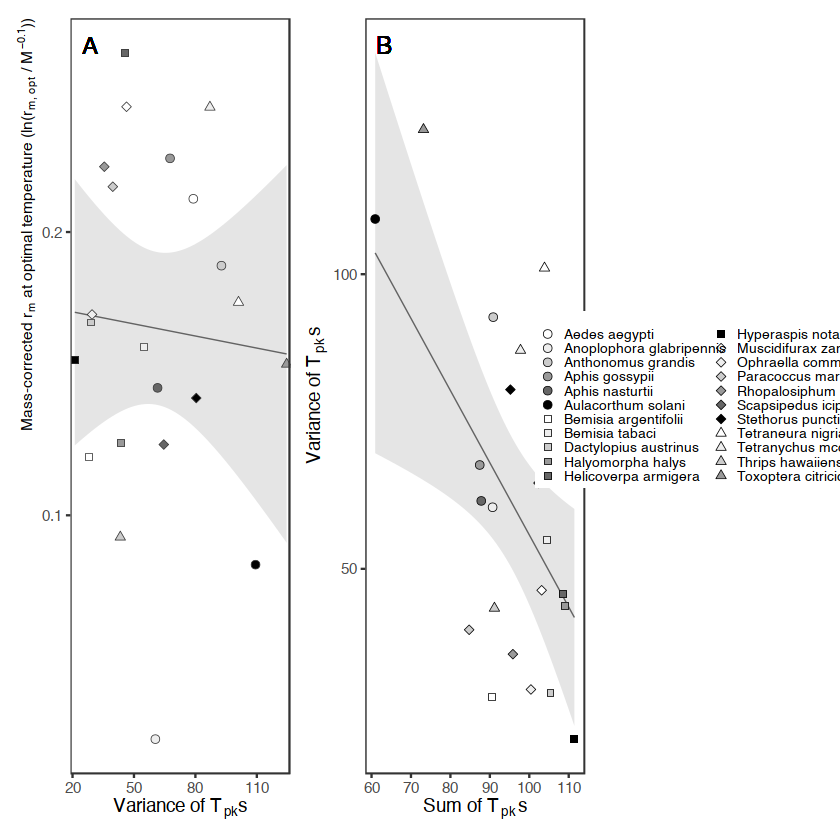

In [29]:
legendz <- get_legend(Sum_vs_Var_Tpks_plot + theme(legend.position = c(0.515,0.525), 
                                                   legend.text = element_text(size = 8, face = 'italic')))

rm_vs_Var_and_Sum <- (Var_rm+Sum_vs_Var_Tpks_plot+legendz)
rm_vs_Var_and_Sum



save_plot(rm_vs_Var_and_Sum, file= "../results/SI/rm_vs_Var_and_Sum.pdf",
          base_height=8.5, base_width = 25, base_asp = 1, units="cm")
